# Séries e Transformada de Fourier em Tempo Contínuo

## Série de Fourier em Tempo Contínuo

### Forma Trigonométrica
   
$$
    x(t) = a_0 + \sum_{k=1}^\infty a_k\cos(k\omega_0 t) + b_k\sin(k\omega_0 t)
$$
    
Os coeficientes $a_0$, $a_k$, e $b_k$ podem ser calculados usando as seguintes equações:
$$
    a_0 = \frac{1}{T_0} \int_{T_0} x(t)dt
$$
$$
    a_k = \frac{2}{T_0} \int_{T_0} x(t) \cos (k\omega_0 t)dt
$$
$$
    b_k = \frac{2}{T_0} \int_{T_0} x(t) \sin (k\omega_0 t)dt
$$

Para realizar esses cálculos, você pode empregar a integração numérica, fazendo uso da função `quad` da biblioteca `scipy.integrate` no Python.

A função `quad` da biblioteca SciPy é utilizada para calcular integrais definidas de funções reais de uma variável. O método de utilização da função é o seguinte:

```python
resultado = quad(f, limite_inferior, limite_superior)
```

**Exemplo 1:** Determine os coeficientes da série de Fourier do sinal $x(t)$, cuja expressão em um período é igual à:

$$
x_p(t) = e^{-t/2}
$$

O sinal se repete a cada $T_0 = \pi$ segundos.

Inicialmente vamos determinar a expressão do sinal em um período. Para tornar o sinal período basta aplicar a seguinte expressão:

$$
x(t) = x_p(t\;\mathrm{mod}\;T_0)
$$
em que $t\;\mathrm{mod}\;T_0$ é o resultado da operação do resto inteiro da divisão entre $t$ e $T_0$. Neste caso, sendo $t = kT_0 + l$, sendo $k$ um número inteiro, então $t \mathrm{mod}\;T_0 = l$.

Para esse exemplo, $T_0 = \pi$ e quando $t = \pi/2$, temos que:

$$
x(\pi/2) = x_p(\pi/2 \;\mathrm{mod}\;\pi) = x_p(\pi/2)
$$

e quando $t = 3\pi/2$ temos que:

$$
x(3\pi/2) = x_p(3\pi/2 \;\mathrm{mod}\;\pi) = x_p(\pi/2)
$$

Portando verifica-se que $x(3\pi/2) = x(\pi/2)$, o que torna o sinal periódico com período $T_0 = \pi$ s.

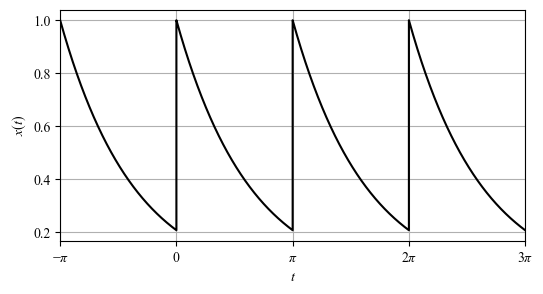

In [3]:
import numpy as np                      #Importa a biblioteca numpy
import matplotlib.pyplot as plt         #Importa a biblioteca matplotlib.pyplot
import scipy.integrate as integrate     #Importa a biblioteca scipy.integrate

#Muda a fonte dos Plots para Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['mathtext.rm'] = "Times New Roman"
plt.rcParams['mathtext.it'] = "Times New Roman:italic"
plt.rcParams['mathtext.bf'] = "Times New Roman:bold"


#Definicao do Sinal em um periodo
def xp(t):
    return np.exp(-t/2)

#Definicao da Expressao do Sinal
def xtilde(t,T0):
    return xp(np.mod(t,T0))

#Parametrizacao de simulacao
Ts = 1e-4                               #Passo
t = np.arange(-np.pi,3*np.pi,Ts)        #Vetor de tempo
T0 = np.pi;                             #Periodo fundamental
w0 = 2*np.pi/T0;                        #Frequencia fundamental
x = xtilde(t,T0)

#Plotar o sinal
plt.figure(figsize=(6,3))
plt.plot(t,x,'k')
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.grid()
plt.xlim(min(t),max(t));
plt.xticks([-np.pi,0,np.pi,2*np.pi,3*np.pi],['$-\\pi$','0','$\\pi$','$2\\pi$','$3\\pi$']);

Calculando os coeficientes da série de Fourier:

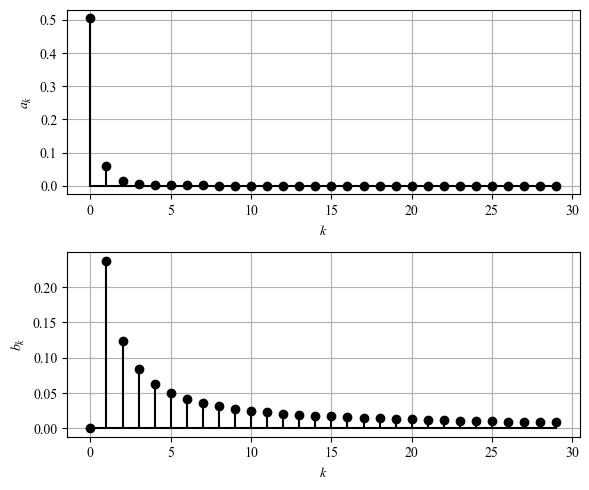

In [10]:
#Funcoes lambda para gerar os termos internos das integrais
fc = lambda t:xtilde(t,T0)*np.cos(w0*k*t)
fs = lambda t:xtilde(t,T0)*np.sin(w0*k*t)

N = 30                                  #Numero de termos da Serie de Fourier
ak = np.zeros(N)                        #Coeficientes ak
bk = np.zeros(N)                        #Coeficientes bk

#Calcular os coeficientes ak e bk
for k in np.arange(0,N):
    ak[k] = integrate.quad(fc,0,T0)[0]*(2.0/T0)
    bk[k] = integrate.quad(fs,0,T0)[0]*(2.0/T0)
ak[0] = ak[0]/2

#Plotar os coeficientes da série
plt.figure(figsize=(6,5))
plt.subplot(2,1,1)
plt.stem(ak,'k',basefmt="k")
plt.xlabel('$k$')
plt.ylabel('$a_k$')
plt.grid()
plt.subplot(2,1,2)
plt.stem(bk,'k',basefmt="k")
plt.xlabel('$k$')
plt.ylabel('$b_k$')
plt.grid()
plt.tight_layout()

Podemos verificar uma aproximação por harmônicas da série de Fourier. Analisando a série truncada até o $N$-ésimo termo da série:

$$
x_N(t) = a_0 + \sum_{k=1}^N a_k\cos(k\omega_0 t) + b_k\sin(k\omega_0 t)
$$
Verifica-se que a medida que $N$ aumenta, $x_N(t)$ se aproxima de $x(t)$. Se $x(t)$ contiver descontinuidades, então ocorre efeito Gibbs. O efeito Gibbs é caracterizado por oscilações espúrias (indesejadas) próximas aos pontos onde a função apresenta descontinuidades.

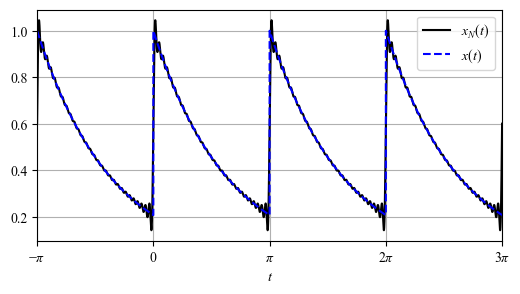

In [12]:
xn = 0.0
for k in np.arange(0,N):
    if k==0:
        xn = xn + ak[k]
    else:
        xn = xn + (ak[k]*np.cos(w0*k*t)+bk[k]*np.sin(w0*k*t))

plt.figure(figsize=(6,3))
plt.plot(t,xn,'k',label='$x_N(t)$')
plt.plot(t,x,'--b',label='$x(t)$')
plt.xlabel('$t$')
plt.grid()
plt.xlim(min(t),max(t));
plt.legend();
plt.xticks([-np.pi,0,np.pi,2*np.pi,3*np.pi],['$-\\pi$','0','$\\pi$','$2\\pi$','$3\\pi$']);

### Forma Trigonométrica Compacta

O espectro do sinal pode ser obtido através da forma trigonométrica compacta, ou seja:

$$
x(t) = C_0 + \sum_{k=1}^\infty C_k \cos(k\omega_0 t + \theta_k)
$$

sendo:

$$
C_k = \sqrt{a_k^2 + b_k^2}
$$

$$
\theta_k = \arctan \left( \frac{-b_k}{a_k} \right)
$$

O gráfico de $C_k \times k$ será o espectro de magnitude e o gráfico de $\theta_k \times k$ será o espectro de fase.

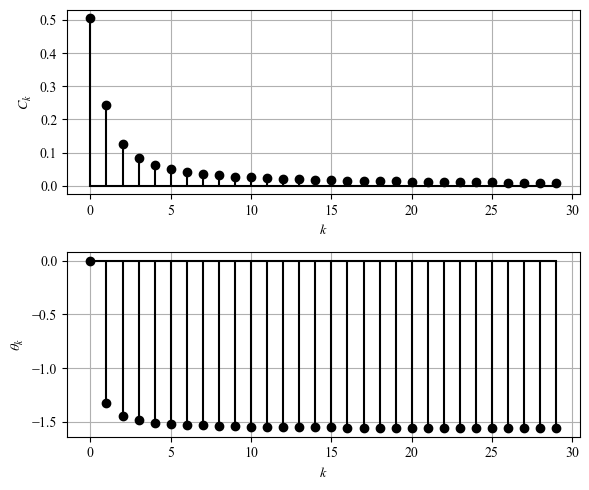

In [13]:
Ck = np.sqrt(ak**2 + bk**2)
Thetak = np.arctan(-bk/ak)

plt.figure(figsize=(6,5))
plt.subplot(2,1,1)
plt.stem(Ck,'k',basefmt="k")
plt.xlabel('$k$')
plt.ylabel('$C_k$')
plt.grid()
plt.subplot(2,1,2)
plt.stem(Thetak,'k',basefmt="k")
plt.xlabel('$k$')
plt.ylabel('$\\theta_k$')
plt.grid()
plt.tight_layout()

### Forma Exponencial

Lembrando que a série de Fourier pode ser escrita na forma exponencial:

$$
x(t) = \sum_{k=-\infty}^\infty D_k e^{jk\omega_0 t}
$$

sendo que os coeficientes $D_k$ são calculados como:

$$
D_k = \frac{1}{T_0} \int_{T_0} x(t)e^{-jk\omega_0 t} dt
$$

Todavia, a função `quad` não pode ser utilizada para calcular integrais cujo resultado sejam números complexos. Assim sendo, devemos aplicar a identidade de Euler para representar a exponencial em termos de senos e cossenos:

$$
D_k = \frac{1}{T_0} \left[ \int_{T_0} x(t)\cos(k\omega_0 t) dt - j \int_{T_0} x(t)\sin(k\omega_0 t) dt \right]
$$

O gráfico de $|D_k| \times k$ será o espectro exponencial de magnitude e o gráfico de $\angle D_k \times k$ será o espectro exponencial de fase.

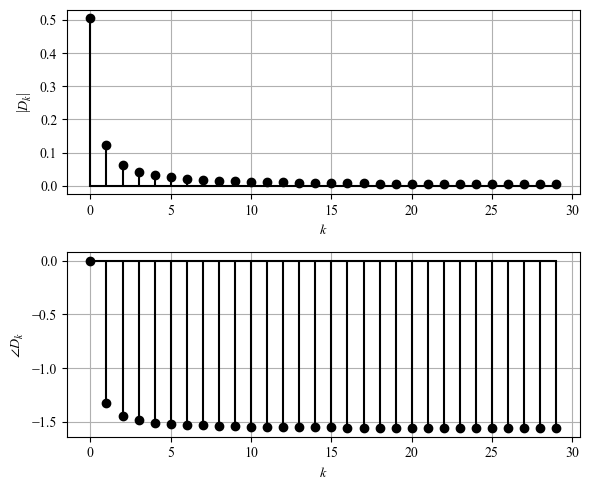

In [14]:
#Funcoes lambda para gerar os termos internos das integrais
fc = lambda t:xtilde(t,T0)*np.cos(w0*k*t)
fs = lambda t:xtilde(t,T0)*np.sin(w0*k*t)

N = 30                                  #Numero de termos da Serie de Fourier
Dk = np.zeros(N) + 1j*np.zeros(N)       #Coeficientes Dk

#Calcular os coeficientes Dk
for k in np.arange(0,N):
    Dk_real = integrate.quad(fc,-T0/2,T0/2)[0]
    Dk_imag = integrate.quad(fs,-T0/2,T0/2)[0]
    Dk[k] = 1/T0*(Dk_real - 1j*Dk_imag)

#Plotar os coeficientes da série
plt.figure(figsize=(6,5))
plt.subplot(2,1,1)
plt.stem(np.abs(Dk),'k',basefmt="k")
plt.xlabel('$k$')
plt.ylabel('$|D_k|$')
plt.grid()
plt.subplot(2,1,2)
plt.stem(np.angle(Dk),'k',basefmt="k")
plt.xlabel('$k$')
plt.ylabel('$\\angle D_k$')
plt.grid()
plt.tight_layout()

## Transformada de Fourier em Tempo Contínuo

Sendo $x(t)$ um sinal aperiódico, verifica-se que esse sinal pode ser representado por uma transformada de Fourier como:
$$
    X(\omega) = \int_{-\infty}^{\infty} x(t)e^{-j\omega t}dt
$$
$$
    x(t) = \frac{1}{2\pi} \int_{-\infty}^\infty X(\omega)e^{j\omega t} d\omega
$$

A transformada de Fourier em tempo contínuo pode ser calculada de forma numérica utilizando o algoritmo da transformada discreta de Fourier. A computação numérica da transformada de Fourier pode ser implementada através da função `fft` da biblioteca `numpy.fft`. Para tonar deslocar o espectro para origem (em torno do zero), basta utilizar a função `fftshift` da biblioteca `numpy.fft`.

In [ ]:
import numpy as np                      #Importa a biblioteca numpy
import numpy.fft as fft                 #Importa a biblioteca numpy.fft
import matplotlib.pyplot as plt         #Importa a biblioteca matplotlib.pyplot

#Muda a fonte para Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['mathtext.rm'] = "Times New Roman"
plt.rcParams['mathtext.it'] = "Times New Roman:italic"
plt.rcParams['mathtext.bf'] = "Times New Roman:bold"

#Funcao para calcular a transformada de Fourier
def ctft(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf

**Exemplo 2:** Determinar a transformada de Fourier para $x(t) = \cos (2 \pi f_c t)$ com $f_c = 500$ Hz.

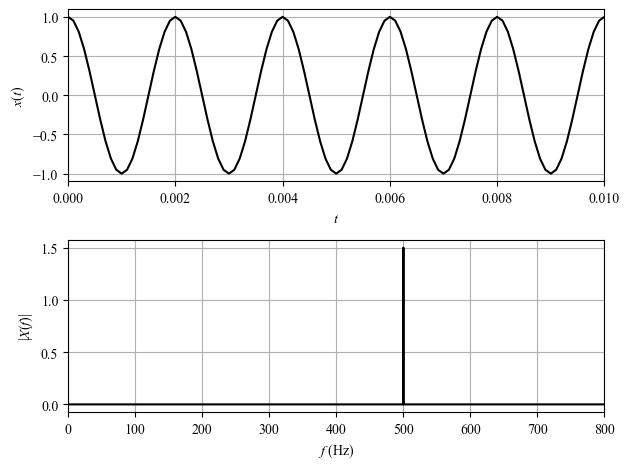

In [19]:
#Parametrizacao de simulacao
Ts = 1e-4                               #Passo
t = np.arange(0,3,Ts)                   #Vetor de tempo
x = np.cos(2*np.pi*500*t)
f,Xf = ctft(x,Ts)

#Plotar o sinal no tempo e na frequencia
plt.figure()
plt.subplot(2,1,1)
plt.plot(t,x,'k')
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.grid()
plt.xlim(0,10e-3);

plt.subplot(2,1,2)
plt.plot(f,np.abs(Xf),'k')
plt.xlabel('$f$ (Hz)')
plt.ylabel('$|X(f)|$')
plt.grid()
plt.tight_layout()
plt.xlim(0,800);

**Exemplo 3:** Determine a transformada de Fourier do sinal:

$$
x(t) = e^{-2t} u(t)
$$

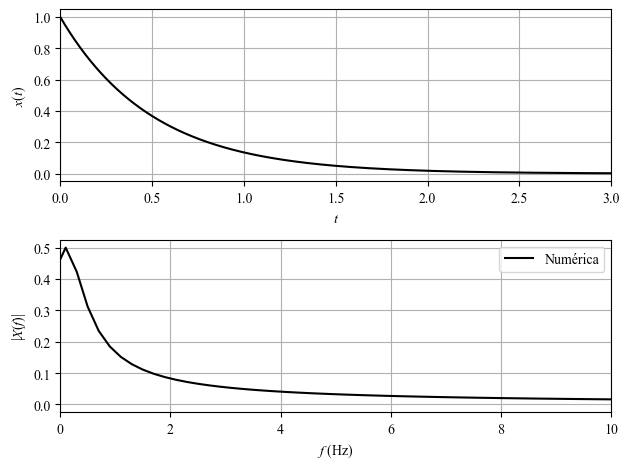

In [20]:
#Parametrizacao de simulacao
Ts = 1e-4                               #Passo
t = np.arange(0,5,Ts)                   #Vetor de tempo
x = np.exp(-2*t)
f,Xf = ctft(x,Ts)

#Plotar o sinal no tempo e na frequencia
plt.figure()
plt.subplot(2,1,1)
plt.plot(t,x,'k')
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.grid()
plt.xlim(0,3)

plt.subplot(2,1,2)
plt.plot(f,np.abs(Xf),'k',label='Numérica')
plt.xlabel('$f$ (Hz)')
plt.ylabel('$|X(f)|$')
plt.grid()
plt.tight_layout()
plt.xlim(0,10)
plt.legend();

**Exemplo 4:** Determinar a transformada de Fourier para $x(t) = \delta (t)$.

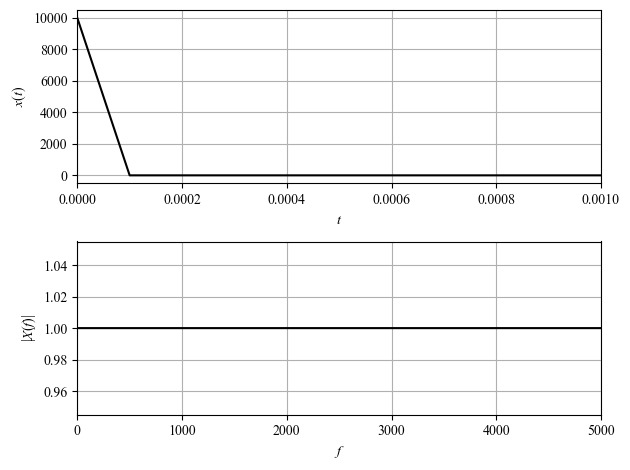

In [21]:
#Parametrizacao de simulacao
Ts = 1e-4                               #Passo
t = np.arange(0,3,Ts)                   #Vetor de tempo
x = np.zeros(len(t))
x[0] = 1/Ts
f,Xf = ctft(x,Ts)

#Plotar o sinal no tempo e na frequencia
plt.figure()
plt.subplot(2,1,1)
plt.plot(t,x,'k')
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.grid()
plt.xlim(0,10e-4);

plt.subplot(2,1,2)
plt.plot(f,np.abs(Xf),'k')
plt.xlabel('$f$')
plt.ylabel('$|X(f)|$')
plt.grid()
plt.tight_layout()
plt.xlim(0,max(f));

## Resposta em Frequência

$$
y(t) = x(t) \ast h(t)
$$

Sendo:

$$
y(t) \Longleftrightarrow Y(\omega)
$$

$$
x(t) \Longleftrightarrow X(\omega)
$$

$$
h(t) \Longleftrightarrow H(\omega)
$$

utilizando a propriedade da convolução da transformada de Fourier, temos que:

$$
Y(\omega) = X(\omega) H(\omega)
$$

tal que $H(\omega)$ é denominado de resposta em frequência. Por ser uma função complexa, a resposta em frequência pode ser representada como:

$$
H(\omega) = |H(\omega)|e^{j\angle H(\omega)}
$$

sendo $|H(\omega)|$ a resposta em magnitude e $\angle H(\omega)$ a resposta em fase. Se um sistema é estável, a resposta em frequência pode ser obtida através da função de transferência como:

$$
H(\omega) = H(s)|_{s = j\omega}
$$

**Exemplo 5:** Determine a resposta em frequência de um sistema LTI estável descrito pela seguinte equação diferencial:

$$
\frac{d^2y(t)}{dt^2} + 3\frac{dy(t)}{dt} + 2y(t) = \frac{dx(t)}{dt} + 5x(t)
$$

A função transferência para esse sistema pode ser obtida aplicando-se a transformada de Laplace em ambos lados da equação:

$$
\frac{Y(s)}{X(s)} = H(s) = \frac{s + 5}{s^2 + 3s + 2}
$$

Para plotar a resposta em frequência podemos utilizar a função `freqresp` da biblioteca `signal`. Neste caso, vamos inicialmente definir uma função de transferência utilizando a função `TransferFunction` da biblioteca `signal`. Para isso, utilizaremos a seguinte sintaxe:

```python
G = signal.TransferFunction(num, den)
```

* `num` é o vetor dos coeficientes do numerador da função de transferência;
* `den` é o vetor dos coeficientes do denominador da função de transferência.

Após isso, podemos calcular a resposta em frequência utilizando a sintaxe:

```python
w, Hw = signal.freqresp(G, w)
```

* `w` é um vetor de frequências (em rad/s);
* `Hs` é a função de transferência do sistema;
* `Hw` é o valor da resposta em frequência.

In [5]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['mathtext.rm'] = "Times New Roman"
plt.rcParams['mathtext.it'] = "Times New Roman:italic"
plt.rcParams['mathtext.bf'] = "Times New Roman:bold"

num = [1, 5]
den = [1, 3, 2]
Hs = signal.TransferFunction(num, den)
print(Hs)

TransferFunctionContinuous(
array([1., 5.]),
array([1., 3., 2.]),
dt: None
)


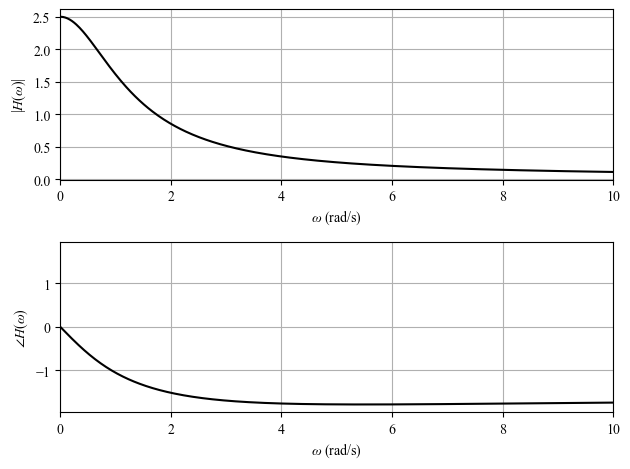

In [22]:
w = np.linspace(-10,10,1000)
_, Hw = signal.freqresp(Hs, w)

plt.figure()
plt.subplot(2,1,1)
plt.plot(w,np.abs(Hw),'k')
plt.xlabel('$\\omega$ (rad/s)')
plt.ylabel('$|H(\\omega)|$')
plt.grid()
plt.xlim(0,max(w));

plt.subplot(2,1,2)
plt.plot(w,np.angle(Hw),'k')
plt.xlabel('$\\omega$ (rad/s)')
plt.ylabel('$\\angle H(\\omega)$')
plt.grid()
plt.xlim(0,max(w));
plt.tight_layout()

Podemos simular a saída do sistema utilizando a função `lsim` da biblioteca `signal`.  A sintaxe será:

```python
_, y, _ = signal.lsim(system, U, T)
```

* `system`: Este é o sistema LTI que você deseja simular;
* `U`: É a entrada que você deseja aplicar ao sistema;
* `T`: Vetor de tempo que especifica os pontos no tempo em que você deseja calcular a resposta do sistema;
* `t`: Vetor de tempo correspondente à resposta calculada do sistema.
* `y`: Vetor que contém a resposta do sistema à entrada especificada.

In [8]:
w3, Hw3 = signal.freqresp(Hs, [3])
print('|H(3)| = ', np.abs(Hw3))
print('< H(3) = ', np.angle(Hw3)*180/np.pi)

|H(3)| =  [0.51140831]
< H(3) =  [-96.91122712]


## Aplicação - Filtros Seletivos em Frequência

Como indicado na teoria, a resposta em magnitude está relacionado ao ganho que um sistema aplica em determinada frequência $\omega$, ao passo que a resposta em fase é o deslocamento em fase que um sistema aplica em uma determinada frequência $\omega$. Em particular, demonstramos que:

$$
\cos(\omega_0 t) \longrightarrow |H(\omega_0)| \cos (\omega_0 t + \angle H(\omega_0))
$$

Projetando-se adequadamente a resposta em magnitude $|H(\omega)|$, é possível construir sistemas que permitam a passagem de certas componentes de frequência e atenuem outras. Esses sistemas são denominados de filtros seletivos em frequência. Os principais tipos de filtros seletivos em frequência são:

1. Filtros Passa-Baixa (LPF - *Low-Pass Filter*);
2. Filtros Passa-Alta (HPF - *High-Pass Filter*);
3. Filtros Passa-Banda (BPF - *Band-Pass Filter*);
4. Filtros Rejeita-Banda (BRF - *Band-Reject Filter* ou *Notch Filter*);
5. Filtros Passa-Tudo (All - *Pass Filter*).

Existem várias aproximações para os filtros, dentre essas aproximações destaca-se o filtro de Butterworth. Os filtros de Butterworth podem ser implementados em Python através da função `butter` da biblioteca `signal`:

```python
b, a = signal.butter(N, Wn, btype='low')
```
* `N`: Ordem do filtro. Este é um número inteiro que determina o quão seletivo ou "fechado" é o filtro.
* `Wn`: Frequência de corte ou uma lista de frequências de corte, dependendo do tipo de filtro e do valor de `btype`. Para um filtro passa-baixas ou passa-alta, `Wn` é uma única frequência de corte normalizada. Para filtros passa-faixas e rejeita-faixas, `Wn` é uma lista de duas frequências de corte normalizadas `[Wn1, Wn2]`. A frequência de corte é normalizada pela frequência de amostragem utilizada na simulação:

$$
W_n = \frac{F_n}{F_s/2}
$$

sendo $F_n$ a frequência em Hz e $F_s = 1/T_s$.

* `btype`: Tipo de filtro. Pode ser uma das seguintes opções:
    * `low`: Passa-baixas (default).
    * `high`: Passa-alta.
    * `band`: Passa-faixas.
    * `bandstop`: Rejeita-faixas.

O retorno será os coeficientes $a$ e $b$ de um filtro. Para filtrar o sinal, deve-se utilizar a função `lfilter` ou `filtfilt`.

Vamos gerar um sinal aleatório e aplicar-ló em um filtro passa-baixas, um passa-altas, um passa-bandas e um rejeita-faixas. O filtro passa-baixas tem frequência de corte de 2 kHz. O filtro passa-altas tem frequência de corte de 1,5 kHz. Os filtros passa-bandas e rejeita-faixas tem frequências de corte inferior e superior iguais à 1 kHz e 2 Khz.

In [10]:
import numpy as np                      #Importa a biblioteca numpy
import scipy.signal as signal
import numpy.fft as fft                 #Importa a biblioteca numpy.fft
import numpy.random as rnd              #Importa a biblioteca numpy.random
import matplotlib.pyplot as plt         #Importa a biblioteca matplotlib.pyplot

#Muda a fonte para Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['mathtext.rm'] = "Times New Roman"
plt.rcParams['mathtext.it'] = "Times New Roman:italic"
plt.rcParams['mathtext.bf'] = "Times New Roman:bold"

#Funcao para Calcular a Transformada de Fourier
def ctft(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf

#Parametrizacao de simulacao
Ts = 1e-4                                #Passo
t = np.arange(0,3,Ts)                    #Vetor de tempo
x = rnd.randn(len(t))
f,Xf = ctft(x,Ts)
ordem = 10                                           # ordem do filtro
Fs = 1/Ts

Criando os filtros e aplicando o sinal aos filtros:

In [11]:
#Filtro Passa-Baixas
fc = 2000                                            # frequência de corte
Wn = fc / (Fs/2)                                     # frequência de corte normalizada
b_lp, a_lp = signal.butter(ordem, Wn, btype='low')   # cálculo dos coeficientes do filtro
x_lp = signal.lfilter(b_lp, a_lp, x)
f,X_lp_f = ctft(x_lp,Ts)

#Filtro Passa-Altas
fc = 1500                                                # frequência de corte
Wn = fc / (Fs/2)                                    # frequência de corte normalizada
b_hp, a_hp = signal.butter(ordem, Wn, btype='high')   # cálculo dos coeficientes do filtro
x_hp = signal.lfilter(b_hp, a_hp, x)
f,X_hp_f = ctft(x_hp,Ts)

#Filtro Passa-Bandas
fc1 = 1000                                               # frequência de corte inferior
fc2 = 2000                                               # frequencia de corte superior
Wn1 = fc1 / (Fs/2)                                  # frequência de corte inferior normalizada
Wn2 = fc2 / (Fs/2)                                  # frequência de corte superior normalizada
b_bp, a_bp = signal.butter(ordem, [Wn1,Wn2], btype='band')   # cálculo dos coeficientes do filtro
x_bp = signal.lfilter(b_bp, a_bp, x)
f,X_bp_f = ctft(x_bp,Ts)

#Filtro Rejeita-Bandas
fc1 = 1000                                               # frequência de corte inferior
fc2 = 2000                                               # frequencia de corte superior
Wn1 = fc1 / (Fs/2)                                  # frequência de corte inferior normalizada
Wn2 = fc2 / (Fs/2)                                  # frequência de corte superior normalizada
b_bs, a_bs = signal.butter(ordem, [Wn1,Wn2], btype='bandstop')   # cálculo dos coeficientes do filtro
x_bs = signal.lfilter(b_bs, a_bs, x)
f,X_bs_f = ctft(x_bs,Ts)

Plotando o espectro de frequências:

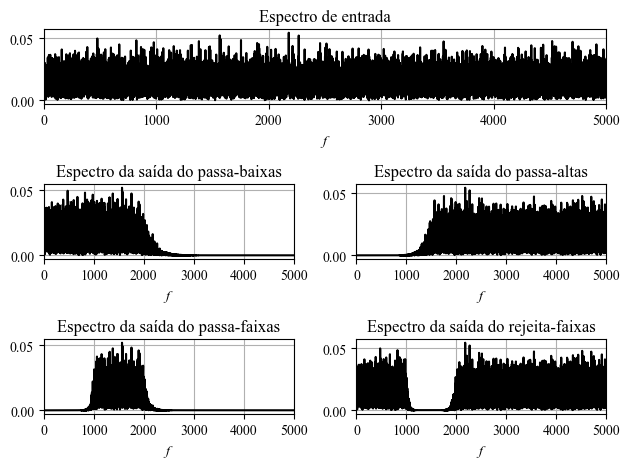

In [13]:
#Plotar o sinal no tempo e na frequencia
plt.figure()
plt.subplot(3,1,1)
plt.plot(f,np.abs(Xf),'k')
plt.xlabel('$f$')
#plt.ylabel('$|X(f)|$')
plt.title('Espectro de entrada')
plt.grid()
plt.tight_layout()
plt.xlim(0,max(f));

plt.subplot(3,2,3)
plt.plot(f,np.abs(X_lp_f),'k')
plt.xlabel('$f$')
#plt.ylabel('$|X_{lp}(f)|$')
plt.title('Espectro da saída do passa-baixas')
plt.grid()
plt.tight_layout()
plt.xlim(0,max(f));

plt.subplot(3,2,4)
plt.plot(f,np.abs(X_hp_f),'k')
plt.xlabel('$f$')
#plt.ylabel('$|X_{lp}(f)|$')
plt.title('Espectro da saída do passa-altas')
plt.grid()
plt.tight_layout()
plt.xlim(0,max(f));

plt.subplot(3,2,5)
plt.plot(f,np.abs(X_bp_f),'k')
plt.xlabel('$f$')
#plt.ylabel('$|X_{bp}(f)|$')
plt.title('Espectro da saída do passa-faixas')
plt.grid()
plt.tight_layout()
plt.xlim(0,max(f));

plt.subplot(3,2,6)
plt.plot(f,np.abs(X_bs_f),'k')
plt.xlabel('$f$')
#plt.ylabel('$|X_{bs}(f)|$')
plt.title('Espectro da saída do rejeita-faixas')
plt.grid()
plt.tight_layout()
plt.xlim(0,max(f));

A resposta em frequência do filtro pode ser determinada utilizando-se a função `freqz` da biblioteca `signal`:

```python
f, H = signal.freqz(b, a, worN=1024, fs=Fs)
```

* `b` e `a` são os coeficientes da função de transferência, gerados pela função `butter`;
* `worN` indica a quantidade de pontos no qual a resposta em frequência será calculada;
* `fs` indica a frequência de amostragem utilizada na simulação.

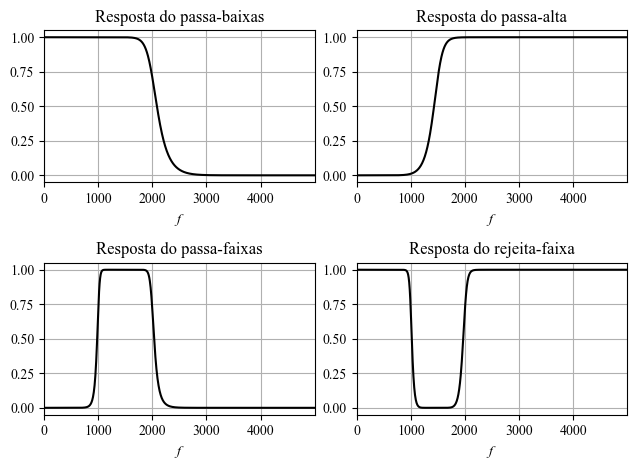

In [14]:
f, Hlp = signal.freqz(b_lp, a_lp, worN=1024, fs=Fs)
f, Hhp = signal.freqz(b_hp, a_hp, worN=1024, fs=Fs)
f, Hbp = signal.freqz(b_bp, a_bp, worN=1024, fs=Fs)
f, Hbs = signal.freqz(b_bs, a_bs, worN=1024, fs=Fs)

plt.subplot(2,2,1)
plt.plot(f,np.abs(Hlp),'k')
plt.xlabel('$f$')
plt.title('Resposta do passa-baixas')
plt.grid()
plt.xlim(0,max(f));

plt.subplot(2,2,2)
plt.plot(f,np.abs(Hhp),'k')
plt.xlabel('$f$')
plt.title('Resposta do passa-alta')
plt.grid()
plt.xlim(0,max(f));

plt.subplot(2,2,3)
plt.plot(f,np.abs(Hbp),'k')
plt.xlabel('$f$')
plt.title('Resposta do passa-faixas')
plt.grid()
plt.xlim(0,max(f));

plt.subplot(2,2,4)
plt.plot(f,np.abs(Hbs),'k')
plt.xlabel('$f$')
plt.title('Resposta do rejeita-faixa')
plt.grid()
plt.xlim(0,max(f));

plt.tight_layout()

Vamos verificar como um filtro passa-baixas pode eliminar componentes de ruído de um sinal. Vamos considerar um sinal senoidal com frequência 10 Hz, ou seja:

$$
x(t) = \cos (20 \pi t)
$$

Supondo que esse sinal é contaminado com um ruído $\eta (t)$, gerado através de uma distribuição Gaussiana,

$$
s(t) = x(t) + 0,2\eta (t)
$$

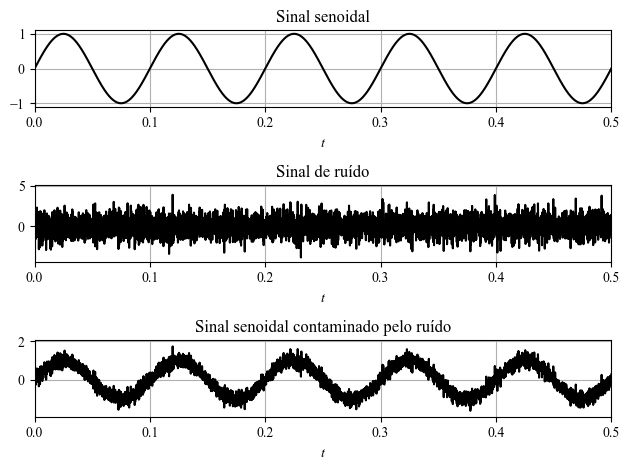

In [15]:
import numpy as np                      #Importa a biblioteca numpy
import scipy.signal as signal
import numpy.fft as fft                 #Importa a biblioteca numpy.fft
import numpy.random as rnd              #Importa a biblioteca numpy.random
import matplotlib.pyplot as plt         #Importa a biblioteca matplotlib.pyplot

#Muda a fonte para Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['mathtext.rm'] = "Times New Roman"
plt.rcParams['mathtext.it'] = "Times New Roman:italic"
plt.rcParams['mathtext.bf'] = "Times New Roman:bold"

#Funcao para Calcular a Transformada de Fourier
def ctft(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf

#Parametrizacao de simulacao
Ts = 1e-4                                #Passo
t = np.arange(0,3,Ts)                    #Vetor de tempo
noise = rnd.randn(len(t))
x = np.sin(2*np.pi*10*t)
s = x + 0.2*noise

plt.figure()
plt.subplot(3,1,1)
plt.plot(t,x,'k')
plt.xlabel('$t$')
plt.title('Sinal senoidal')
plt.grid()
plt.xlim(0,0.5)

plt.subplot(3,1,2)
plt.plot(t,noise,'k')
plt.xlabel('$t$')
plt.title('Sinal de ruído')
plt.grid()
plt.xlim(0,0.5)

plt.subplot(3,1,3)
plt.plot(t,s,'k')
plt.xlabel('$t$')
plt.title('Sinal senoidal contaminado pelo ruído')
plt.grid()
plt.xlim(0,0.5)
plt.tight_layout()

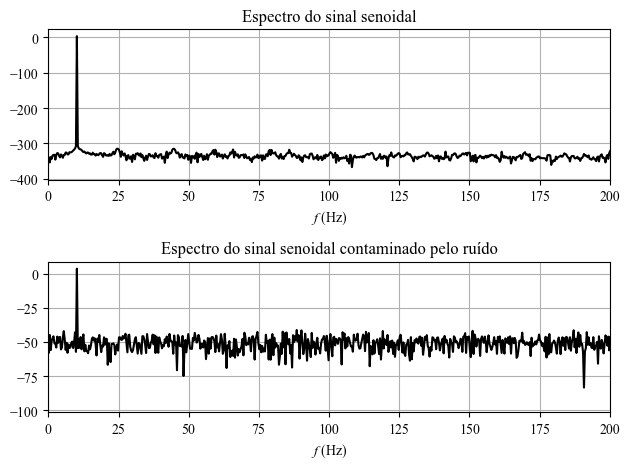

In [17]:
f, Xf = ctft(x,Ts)
f, Ff = ctft(s,Ts)

plt.figure()
plt.subplot(2,1,1)
plt.plot(f,20*np.log10(np.abs(Xf)),'k')
plt.xlabel('$f$ (Hz)')
plt.title('Espectro do sinal senoidal')
plt.xlim(0,200)
plt.grid()
plt.subplot(2,1,2)
plt.plot(f,20*np.log10(np.abs(Ff)),'k')
plt.xlabel('$f$ (Hz)')
plt.title('Espectro do sinal senoidal contaminado pelo ruído')
plt.xlim(0,200)
plt.grid()
plt.tight_layout()

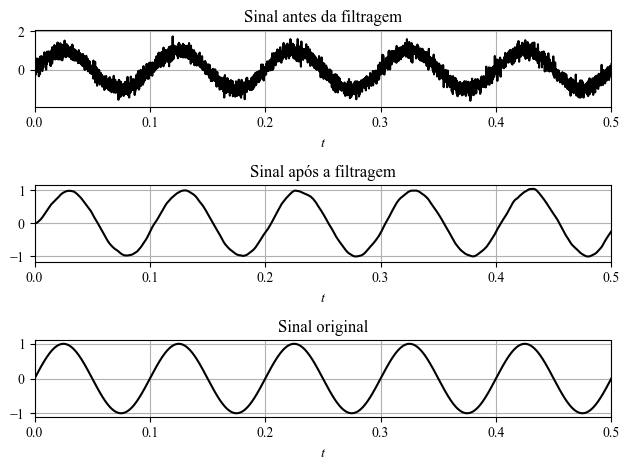

In [18]:
ordem = 2                                           # ordem do filtro
Fs = 1/Ts

#Filtro Passa-Baixas
fc = 50                                              # frequência de corte
Wn = fc / (Fs/2)                                     # frequência de corte normalizada
b_lp, a_lp = signal.butter(ordem, Wn, btype='low')   # cálculo dos coeficientes do filtro
s_lp = signal.lfilter(b_lp, a_lp, s)
f,S_lp_f = ctft(s_lp,Ts)

plt.figure()
plt.subplot(3,1,1)
plt.plot(t,s,'k')
plt.xlabel('$t$')
plt.title('Sinal antes da filtragem')
plt.grid()
plt.xlim(0,0.5)

plt.subplot(3,1,2)
plt.plot(t,s_lp,'k')
plt.xlabel('$t$')
plt.title('Sinal após a filtragem')
plt.grid()
plt.xlim(0,0.5)

plt.subplot(3,1,3)
plt.plot(t,x,'k')
plt.xlabel('$t$')
plt.title('Sinal original')
plt.grid()
plt.xlim(0,0.5)

plt.tight_layout()

Vamos aplicar alguns filtros em sinais de áudio. Inicialmente vamos abrir o nosso arquivo de áudio.

In [24]:
import numpy as np
import scipy.signal as signal
import IPython
from scipy.io import wavfile

Fs, x = wavfile.read('ednaldo.wav');
x = x/32768.0

IPython.display.Audio(data=x, rate=Fs)

C:\Users\souza\AppData\Local\Temp\ipykernel_19152\2493467366.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs, x = wavfile.read('ednaldo.wav');


In [25]:
#Filtro Passa-Baixas
fc = 2000                                                # frequência de corte
ordem = 10                                              # ordem do filtro
Wn = fc / (Fs/2)                                    # frequência de corte normalizada
b_lp, a_lp = signal.butter(ordem, Wn, btype='lowpass')   # cálculo dos coeficientes do filtro
x_lp = signal.filtfilt(b_lp, a_lp, x)

IPython.display.Audio(data=x_lp, rate=Fs)

In [26]:
#Filtro Passa-Altas
fc = 4000                                                # frequência de corte
ordem = 10                                              # ordem do filtro
Wn = fc / (Fs/2)                                    # frequência de corte normalizada
b_hp, a_hp = signal.butter(ordem, Wn, btype='highpass')   # cálculo dos coeficientes do filtro
x_hp = signal.filtfilt(b_hp, a_hp, x)

IPython.display.Audio(data=x_hp, rate=Fs)

## Aplicação - Modulação em Amplitude

Na modulação em amplitude com banda lateral dupla e portadora suprimida (AM-DSB-SC), a amplitude da portadora varia de acordo com o sinal modulante:

$$
\varphi_{AM}(t) = m(t) \cos(\omega_c t)
$$
sendo $\omega_c$ a frequência da portadora. O sinal $m(t)$ é o sinal modulante, também denominado de sinal em banda-base.

Vamos considerar a modulação de um sinal banda-base que é (quase) estritamente limitado em banda e que consiste em três versões atrasadas de um mesmo sinal do tipo sinc:

$$
m(t) = 2\mathrm{sinc} \left( \frac{2\pi t}{T_a} \right) + \mathrm{sinc} \left( \left(\frac{2 t}{T_a} + 1\right)\pi \right) + \mathrm{sinc} \left( \left(\frac{2 t}{T_a} - 1\right)\pi \right)
$$

sendo,

$$
\mathrm{sinc} (t) = \frac{\sin t}{t}
$$

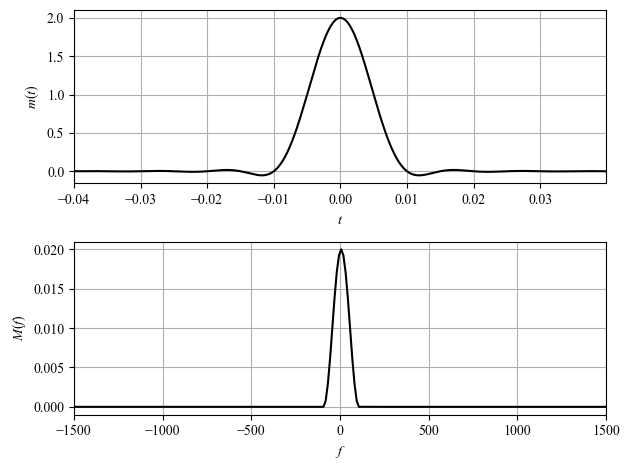

In [29]:
import numpy as np
import numpy.fft as fft
import scipy.signal as signal
import matplotlib.pyplot as plt

#Muda a fonte para Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['mathtext.rm'] = "Times New Roman"
plt.rcParams['mathtext.it'] = "Times New Roman:italic"
plt.rcParams['mathtext.bf'] = "Times New Roman:bold"

#Funcao para gerar a Sinc
def sinc(t):
    return np.where(t == 0, 1, np.sin(t)/t)

#Funcao para o sinal em banda base para a modulacao AM
def triplesinc(t,Ta):
    sig_1 = sinc((2*t/Ta)*np.pi)
    sig_2 = sinc((2*t/Ta - 1)*np.pi)
    sig_3 = sinc((2*t/Ta + 1)*np.pi)
    return 2*sig_1 + sig_2 + sig_3

#Funcao para Calcular a Transformada de Fourier
def ctft(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf

#Parametrizacao de simulacao
Ts = 1e-4                                #Passo
t = np.arange(-0.04,0.04,Ts)             #Vetor de tempo

#Cria o sinal de mensagem
Ta = 0.01
m = triplesinc(t,Ta)
f, Mf = ctft(m,Ts)

#Plot do sinal de mensagem e de portadora
plt.figure()
plt.subplot(2,1,1)
plt.plot(t,m,'k')
plt.ylabel('$m(t)$')
plt.xlabel('$t$')
plt.xlim(min(t),max(t))
plt.grid()
plt.subplot(2,1,2)
plt.plot(f,np.abs(Mf),'k')
plt.ylabel('$M(f)$')
plt.xlabel('$f$')
plt.xlim(-1500,1500)
plt.grid()
plt.tight_layout()

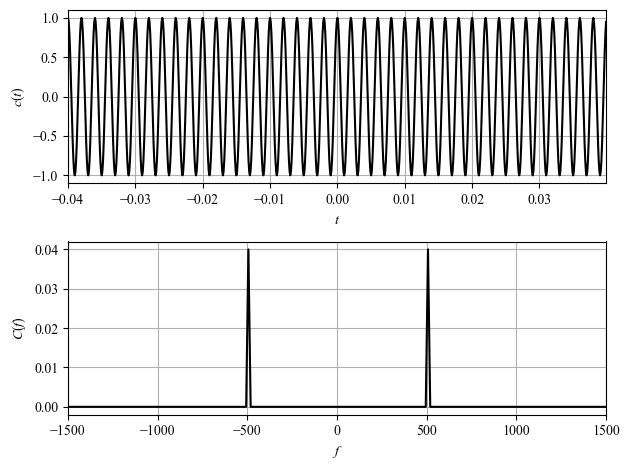

In [30]:
fc = 500
carrier = np.cos(2*np.pi*fc*t)
f, Cf = ctft(carrier,Ts)

#Plot do sinal de mensagem e de portadora
plt.figure()
plt.subplot(2,1,1)
plt.plot(t,carrier,'k')
plt.ylabel('$c(t)$')
plt.xlabel('$t$')
plt.xlim(min(t),max(t))
plt.grid()
plt.subplot(2,1,2)
plt.plot(f,np.abs(Cf),'k')
plt.ylabel('$C(f)$')
plt.xlabel('$f$')
plt.xlim(-1500,1500)
plt.grid()
plt.tight_layout()

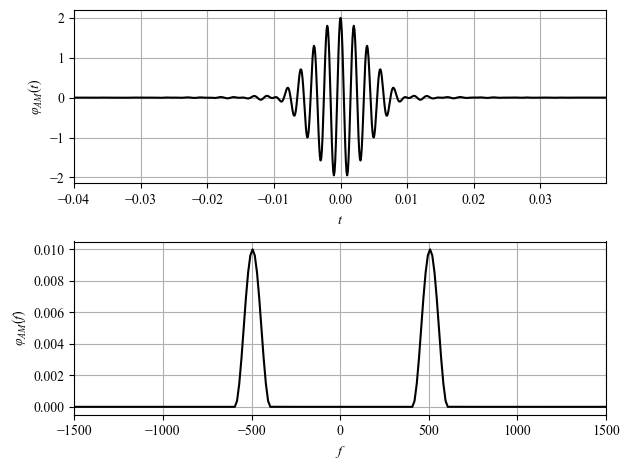

In [31]:
#Cria o sinal AM e calcula a sua transformada de Fourier
phi_am = m*carrier
f, Phi_amf = ctft(phi_am,Ts)

#Plot do sinal de mensagem e de portadora
plt.figure()
plt.subplot(2,1,1)
plt.plot(t,phi_am,'k')
plt.ylabel('$\\varphi_{AM}(t)$')
plt.xlabel('$t$')
plt.xlim(min(t),max(t))
plt.grid()
plt.subplot(2,1,2)
plt.plot(f,np.abs(Phi_amf),'k')
plt.ylabel('$\\varphi_{AM}(f)$')
plt.xlabel('$f$')
plt.xlim(-1500,1500)
plt.grid()
plt.tight_layout()

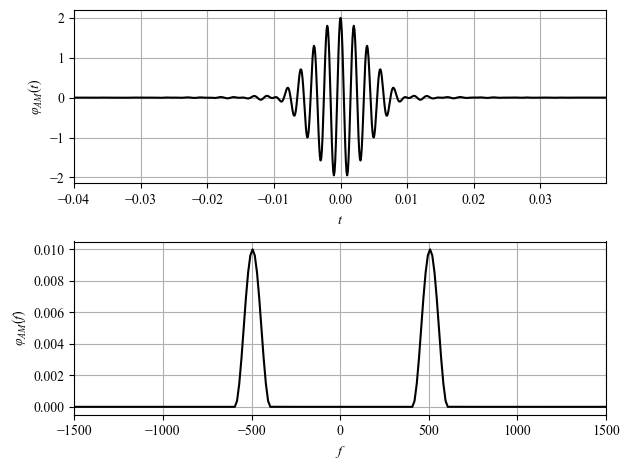

In [32]:
#Cria o sinal AM e calcula a sua transformada de Fourier
phi_am = m*carrier
f, Phi_amf = ctft(phi_am,Ts)

#Plot do sinal de mensagem e de portadora
plt.figure()
plt.subplot(2,1,1)
plt.plot(t,phi_am,'k')
plt.ylabel('$\\varphi_{AM}(t)$')
plt.xlabel('$t$')
plt.xlim(min(t),max(t))
plt.grid()
plt.subplot(2,1,2)
plt.plot(f,np.abs(Phi_amf),'k')
plt.ylabel('$\\varphi_{AM}(f)$')
plt.xlabel('$f$')
plt.xlim(-1500,1500)
plt.grid()
plt.tight_layout()

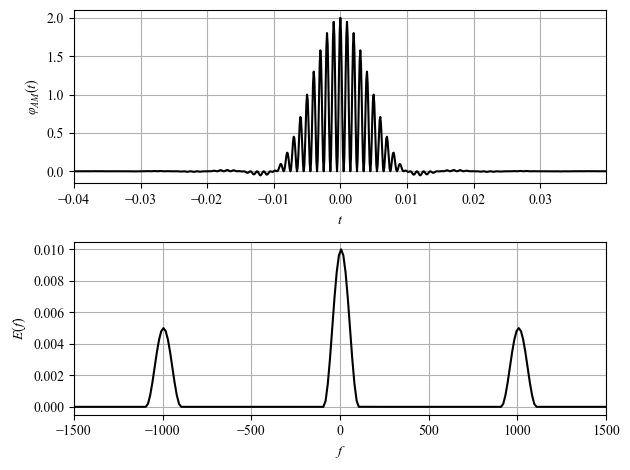

In [36]:
e = phi_am*carrier

f, Ef = ctft(e,Ts)

#Plot do sinal de mensagem e de portadora
plt.figure()
plt.subplot(2,1,1)
plt.plot(t,e,'k')
plt.ylabel('$\\varphi_{AM}(t)$')
plt.xlabel('$t$')
plt.xlim(min(t),max(t))
plt.grid()
plt.subplot(2,1,2)
plt.plot(f,np.abs(Ef),'k')
plt.ylabel('$E(f)$')
plt.xlabel('$f$')
plt.xlim(-1500,1500)
plt.grid()
plt.tight_layout()

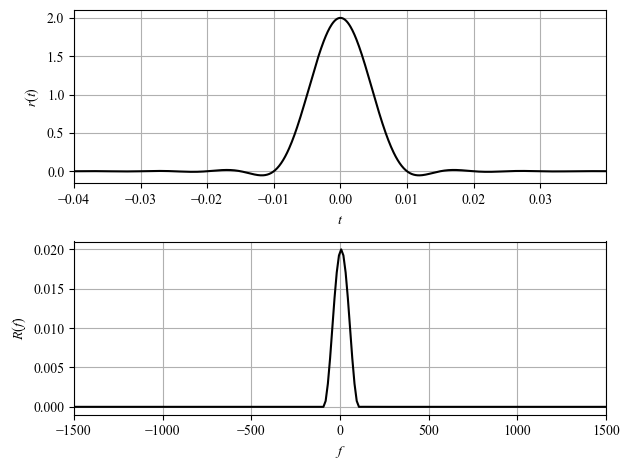

In [37]:
#Parametros do Filtro Passa-baixas
fc = 250                                               # frequência de corte
ordem = 10                                              # ordem do filtro
Fs = 1/Ts
Wn = fc / (Fs/2)                                   # frequência de corte normalizada
b, a = signal.butter(ordem, Wn, btype='lowpass')   # cálculo dos coeficientes do filtro

# Aplicação do filtro
r = 2*signal.filtfilt(b, a, e)
f, Rf = ctft(r,Ts)

#Plot do sinal de mensagem e de portadora
plt.figure()
plt.subplot(2,1,1)
plt.plot(t,r,'k')
plt.ylabel('$r(t)$')
plt.xlabel('$t$')
plt.xlim(min(t),max(t))
plt.grid()
plt.subplot(2,1,2)
plt.plot(f,np.abs(Rf),'k')
plt.ylabel('$R(f)$')
plt.xlabel('$f$')
plt.xlim(-1500,1500)
plt.grid()
plt.tight_layout()

## Aplicação - Multiplexação por Divisão em Frequência

A multiplexação consiste no processo de enviar vários sinais em um mesmo canal de comunicações. Na multiplexação por divisão na frequência, cada sinal é modulado por uma portadora com frequência diferente. Cada frequência é escolhida de forma a não interferir nas demais.

Considere que desejamos enviar dois sinais $m_1(t)$ e $m_2(t)$ sobre um canal de comunicações:

$$
m_1(t) = \Delta \left( \frac{t + 0,01}{0,01} \right) - \Delta \left( \frac{t - 0,01}{0,01} \right)
$$

$$
m_2(t) = 2\mathrm{sinc} \left( \frac{2\pi t}{T_a} \right) + \mathrm{sinc} \left( \left(\frac{2 t}{T_a} + 1\right)\pi \right) + \mathrm{sinc} \left( \left(\frac{2 t}{T_a} - 1\right)\pi \right)
$$

Supondo que sejam utilizadas como frequências de portadoras $f_1 = 500$ Hz e $f_2 = 1000$ Hz. No caso, o sinal a ser transmitido é dado por:

$$
x(t) = m_1(t)\cos(2\pi f_1 t) + m_2(t)\cos(2\pi f_2 t)
$$

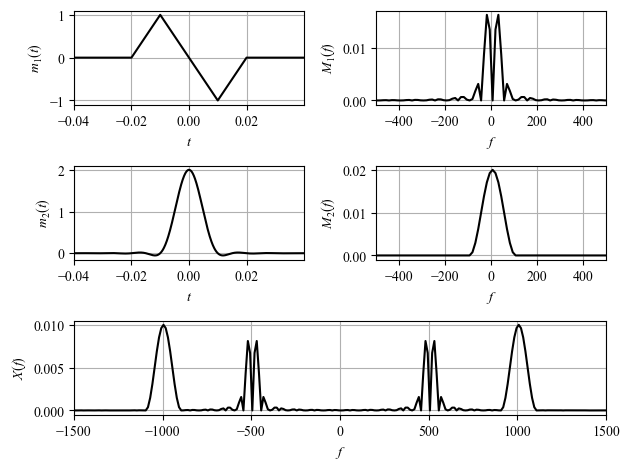

In [38]:
import numpy as np
import numpy.fft as fft
import scipy.signal as signal
import matplotlib.pyplot as plt

#Muda a fonte para Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['mathtext.rm'] = "Times New Roman"
plt.rcParams['mathtext.it'] = "Times New Roman:italic"
plt.rcParams['mathtext.bf'] = "Times New Roman:bold"

#Funcao para gerar a Sinc
def sinc(t):
    return np.where(t == 0, 1, np.sin(t)/t)

#Funcao para o sinal em banda base para a modulacao AM
def triplesinc(t,Ta):
    sig_1 = sinc((2*t/Ta)*np.pi)
    sig_2 = sinc((2*t/Ta - 1)*np.pi)
    sig_3 = sinc((2*t/Ta + 1)*np.pi)
    return 2*sig_1 + sig_2 + sig_3

#Definir a funcao Trig
def Trig(t):
    return (1 - np.abs(t))*(np.logical_and(t>=-1,t<1))

#Funcao para Calcular a Transformada de Fourier
def ctft(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf

#Parametrizacao de simulacao
Ts = 1e-4                                		    #Passo
t = np.arange(-0.04,0.04,Ts)             		    #Vetor de tempo
m1 = Trig((t+0.01)/0.01) - Trig((t-0.01)/0.01);		#Define o primeiro sinal
f, M1f = ctft(m1,Ts)
Ta = 0.01
m2 = triplesinc(t,Ta)					            #Define o segundo sinal
f, M2f = ctft(m2,Ts)

#Definicao da Multiplexacao
f1 = 500
f2 = 1000
x = m1*np.cos(2*np.pi*f1*t) + m2*np.cos(2*np.pi*f2*t)
f, Xf = ctft(x,Ts)

#Plot do sinal de mensagem e de portadora
plt.figure()
plt.subplot(3,2,1)
plt.plot(t,m1,'k')
plt.ylabel('$m_1(t)$')
plt.xlabel('$t$')
plt.xlim(min(t),max(t))
plt.grid()
plt.subplot(3,2,2)
plt.plot(f,np.abs(M1f),'k')
plt.ylabel('$M_1(f)$')
plt.xlabel('$f$')
plt.xlim(-500,500)
plt.grid()
plt.subplot(3,2,3)
plt.plot(t,m2,'k')
plt.ylabel('$m_2(t)$')
plt.xlabel('$t$')
plt.xlim(min(t),max(t))
plt.grid()
plt.subplot(3,2,4)
plt.plot(f,np.abs(M2f),'k')
plt.ylabel('$M_2(f)$')
plt.xlabel('$f$')
plt.xlim(-500,500)
plt.grid()
plt.subplot(3,1,3)
plt.plot(f,np.abs(Xf),'k')
plt.ylabel('$X(f)$')
plt.xlabel('$f$')
plt.xlim(-1500,1500)
plt.grid()
plt.tight_layout()

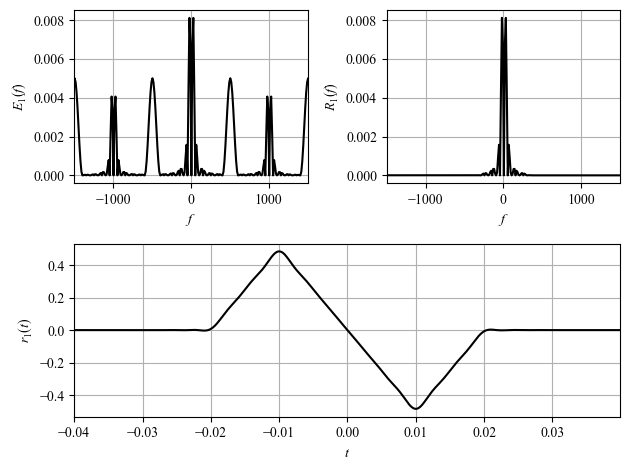

In [39]:
e1 = x*np.cos(2*np.pi*f1*t)
f, E1f = ctft(e1,Ts)

#Parametros do Filtro Passa-baixas
Bw_1 = 300                                              #Largura de Banda do sinal m1(t)
W = Bw_1                                                # frequência de corte
ordem = 10                                              # ordem do filtro
Fs = 1/Ts
fc_norm = W / (Fs/2)                                   # frequência de corte normalizada
b, a = signal.butter(ordem, fc_norm, btype='lowpass')   # cálculo dos coeficientes do filtro

# Aplicação do filtro
r1 = signal.filtfilt(b, a, e1)
f, R1f = ctft(r1,Ts)

#Plot do sinal de mensagem e de portadora
plt.figure()
plt.subplot(2,2,1)
plt.plot(f,np.abs(E1f),'k')
plt.ylabel('$E_1(f)$')
plt.xlabel('$f$')
plt.xlim(-1500,1500)
plt.grid()
plt.subplot(2,2,2)
plt.plot(f,np.abs(R1f),'k')
plt.ylabel('$R_1(f)$')
plt.xlabel('$f$')
plt.xlim(-1500,1500)
plt.grid()
plt.subplot(2,1,2)
plt.plot(t,r1,'k')
plt.ylabel('$r_1(t)$')
plt.xlabel('$t$')
plt.xlim(min(t),max(t))
plt.grid()
plt.tight_layout()

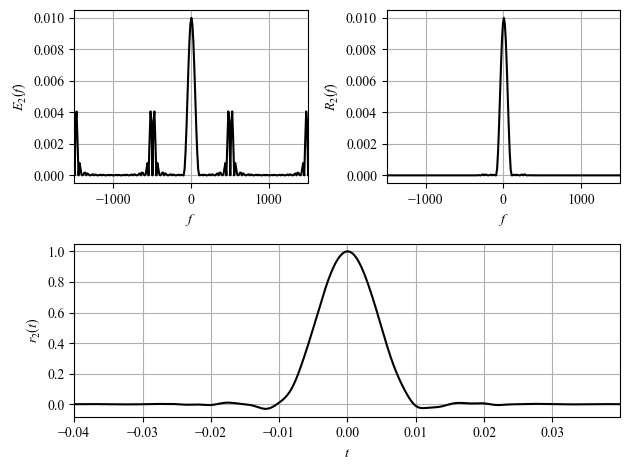

In [40]:
e2 = x*np.cos(2*np.pi*f2*t)
f, E2f = ctft(e2,Ts)

#Parametros do Filtro Passa-baixas
Bw_2 = 300                                              #Largura de Banda do sinal m1(t)
W = Bw_2                                                # frequência de corte
ordem = 10                                              # ordem do filtro
Fs = 1/Ts
fc_norm = W / (Fs/2)                                   # frequência de corte normalizada
b, a = signal.butter(ordem, fc_norm, btype='lowpass')   # cálculo dos coeficientes do filtro

# Aplicação do filtro
r2 = signal.filtfilt(b, a, e2)
f, R2f = ctft(r2,Ts)

#Plot do sinal de mensagem e de portadora
plt.figure()
plt.subplot(2,2,1)
plt.plot(f,np.abs(E2f),'k')
plt.ylabel('$E_2(f)$')
plt.xlabel('$f$')
plt.xlim(-1500,1500)
plt.grid()
plt.subplot(2,2,2)
plt.plot(f,np.abs(R2f),'k')
plt.ylabel('$R_2(f)$')
plt.xlabel('$f$')
plt.xlim(-1500,1500)
plt.grid()
plt.subplot(2,1,2)
plt.plot(t,r2,'k')
plt.ylabel('$r_2(t)$')
plt.xlabel('$t$')
plt.xlim(min(t),max(t))
plt.grid()
plt.tight_layout()